In [1]:
!pip install pandas

In [2]:
import pandas as pd

In [3]:
summaries_train_df = pd.read_csv('../data/summaries_train.csv')
summaries_test_df = pd.read_csv('../data/summaries_test.csv')
prompts_train_df = pd.read_csv('../data/prompts_train.csv')
prompts_test_df = pd.read_csv('../data/prompts_test.csv')

In [4]:
summaries_train_df.head()

,student_id,prompt_id,text,content,wording
0,000e8c3c7ddb,814d6b,The third wave was an experimentto see how peo...,0.205683,0.380538
1,0020ae56ffbf,ebad26,They would rub it up with soda to make the sme...,-0.548304,0.506755
2,004e978e639e,3b9047,"In Egypt, there were many occupations and soci...",3.128928,4.231226
3,005ab0199905,3b9047,The highest class was Pharaohs these people we...,-0.210614,-0.471415
4,0070c9e7af47,814d6b,The Third Wave developed rapidly because the ...,3.272894,3.219757


In [5]:
summaries_test_df.head()

,student_id,prompt_id,text
0,000000ffffff,abc123,Example text 1
1,111111eeeeee,def789,Example text 2
2,222222cccccc,abc123,Example text 3
3,333333dddddd,def789,Example text 4


In [6]:
prompts_train_df.head()

,prompt_id,prompt_question,prompt_title,prompt_text
0,39c16e,Summarize at least 3 elements of an ideal trag...,On Tragedy,Chapter 13 \r\nAs the sequel to what has alrea...
1,3b9047,"In complete sentences, summarize the structure...",Egyptian Social Structure,Egyptian society was structured like a pyramid...
2,814d6b,Summarize how the Third Wave developed over su...,The Third Wave,Background \r\nThe Third Wave experiment took ...
3,ebad26,Summarize the various ways the factory would u...,Excerpt from The Jungle,"With one member trimming beef in a cannery, an..."


In [7]:
prompts_test_df.head()

,prompt_id,prompt_question,prompt_title,prompt_text
0,abc123,Summarize...,Example Title 1,Heading\nText...
1,def789,Summarize...,Example Title 2,Heading\nText...


##### Unique values of "prompt_id" from summaries_train

In [8]:
print(summaries_train_df['prompt_id'].unique())

['814d6b' 'ebad26' '3b9047' '39c16e']


This shows that every summary in summaries_train correspond to one of 4 prompt questions in prompts_train.csv

# Tokenization

In [9]:
! pip install nltk

In [10]:
import nltk
from nltk.tokenize import word_tokenize

# Download the 'punkt' resource
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/duje/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [11]:
prompts_train_df['prompt_question_tokenized'] = prompts_train_df['prompt_question'].apply(word_tokenize)
prompts_train_df['prompt_title_tokenized'] = prompts_train_df['prompt_title'].apply(word_tokenize)
prompts_train_df['prompt_text_tokenized'] = prompts_train_df['prompt_text'].apply(word_tokenize)
prompts_train_df.head()

,prompt_id,prompt_question,prompt_title,prompt_text,prompt_question_tokenized,prompt_title_tokenized,prompt_text_tokenized
0,39c16e,Summarize at least 3 elements of an ideal trag...,On Tragedy,Chapter 13 \r\nAs the sequel to what has alrea...,"[Summarize, at, least, 3, elements, of, an, id...","[On, Tragedy]","[Chapter, 13, As, the, sequel, to, what, has, ..."
1,3b9047,"In complete sentences, summarize the structure...",Egyptian Social Structure,Egyptian society was structured like a pyramid...,"[In, complete, sentences, ,, summarize, the, s...","[Egyptian, Social, Structure]","[Egyptian, society, was, structured, like, a, ..."
2,814d6b,Summarize how the Third Wave developed over su...,The Third Wave,Background \r\nThe Third Wave experiment took ...,"[Summarize, how, the, Third, Wave, developed, ...","[The, Third, Wave]","[Background, The, Third, Wave, experiment, too..."
3,ebad26,Summarize the various ways the factory would u...,Excerpt from The Jungle,"With one member trimming beef in a cannery, an...","[Summarize, the, various, ways, the, factory, ...","[Excerpt, from, The, Jungle]","[With, one, member, trimming, beef, in, a, can..."


In [12]:
summaries_train_df['text_tokenized'] = summaries_train_df['text'].apply(word_tokenize)
summaries_train_df.head()

,student_id,prompt_id,text,content,wording,text_tokenized
0,000e8c3c7ddb,814d6b,The third wave was an experimentto see how peo...,0.205683,0.380538,"[The, third, wave, was, an, experimentto, see,..."
1,0020ae56ffbf,ebad26,They would rub it up with soda to make the sme...,-0.548304,0.506755,"[They, would, rub, it, up, with, soda, to, mak..."
2,004e978e639e,3b9047,"In Egypt, there were many occupations and soci...",3.128928,4.231226,"[In, Egypt, ,, there, were, many, occupations,..."
3,005ab0199905,3b9047,The highest class was Pharaohs these people we...,-0.210614,-0.471415,"[The, highest, class, was, Pharaohs, these, pe..."
4,0070c9e7af47,814d6b,The Third Wave developed rapidly because the ...,3.272894,3.219757,"[The, Third, Wave, developed, rapidly, because..."


# EDA

In [13]:
def deep_type(obj):
    if isinstance(obj, (list, tuple, set, pd.core.series.Series)):
        if obj:
            return type(obj).__name__ + " of " + deep_type(obj[0])
        else:
            return type(obj).__name__
    else:
        return type(obj).__name__

def print_column_types(df):
    # Determine the maximum column name length for alignment
    max_col_len = max(len(col) for col in df.columns)

    for column in df.columns:
        first_non_na = df[column].dropna().iloc[0] if not df[column].isna().all() else None
        if first_non_na is not None:
            print(f"column: {column:<{max_col_len}} \t type: {deep_type(first_non_na)}")
        else:
            print(f"column: {column:<{max_col_len}} \t type: {type(first_non_na).__name__}")

In [14]:
print_column_types(prompts_train_df)
prompts_train_df.head(1)

column: prompt_id                 	 type: str
column: prompt_question           	 type: str
column: prompt_title              	 type: str
column: prompt_text               	 type: str
column: prompt_question_tokenized 	 type: list of str
column: prompt_title_tokenized    	 type: list of str
column: prompt_text_tokenized     	 type: list of str


,prompt_id,prompt_question,prompt_title,prompt_text,prompt_question_tokenized,prompt_title_tokenized,prompt_text_tokenized
0,39c16e,Summarize at least 3 elements of an ideal trag...,On Tragedy,Chapter 13 \r\nAs the sequel to what has alrea...,"[Summarize, at, least, 3, elements, of, an, id...","[On, Tragedy]","[Chapter, 13, As, the, sequel, to, what, has, ..."


In [15]:
print_column_types(summaries_train_df)
summaries_train_df.head(1)

column: student_id     	 type: str
column: prompt_id      	 type: str
column: text           	 type: str
column: content        	 type: float64
column: wording        	 type: float64
column: text_tokenized 	 type: list of str


,student_id,prompt_id,text,content,wording,text_tokenized
0,000e8c3c7ddb,814d6b,The third wave was an experimentto see how peo...,0.205683,0.380538,"[The, third, wave, was, an, experimentto, see,..."


### Analysing "summaries_train" data

In [16]:
#!pip install plotly
#!pip install nbformat --upgrade
#!pip install plotly cufflinks
import cufflinks as cf
cf.go_offline()

summaries_train_df['text'].str.len().iplot(
    kind='hist',
    bins=60,
    xTitle='character count',
    yTitle='count',
    title='Number of characters per summary',
    color='blue')

summaries_train_df['text_tokenized'].apply(len).iplot(
    kind='hist',
    bins=60,
    xTitle='word count',
    yTitle='count',
    title='Number of words per summary',
    color='blue')

(summaries_train_df['text'].str.len()/summaries_train_df['text_tokenized'].apply(len)).iplot(
    kind='hist',
    bins=60,
    xTitle='character count',
    yTitle='count',
    title='Number of characters per word',
    color='blue')



In [17]:
summaries_train_df['content'].iplot(
    kind='hist',
    bins=60,
    xTitle='content score',
    yTitle='count',
    title='Content score distribution',
    color='blue')

summaries_train_df['wording'].iplot(
    kind='hist',
    bins=60,
    xTitle='wording score',
    yTitle='count',
    title='Wording score distribution',
    color='blue')

##### Counting stopwords

In [18]:
nltk.download('stopwords')

import string
from nltk.corpus import stopwords
stop=set(stopwords.words('english'))

def filter_stopwords(tokens):
    return [word for word in tokens if word not in stop and word.isalnum()]

# Create a column with only stopwords
summaries_train_df['stopwords'] = summaries_train_df['text_tokenized'].apply(lambda x: [word for word in x if word in stop])

# Create a column with only non-stopwords (alphanumeric words)
summaries_train_df['non_stopwords'] = summaries_train_df['text_tokenized'].apply(filter_stopwords)

summaries_train_df.head(1)

summaries_train_df['stopwords'].apply(len).iplot(
    kind='hist',
    bins=60,
    xTitle='stopword count',
    yTitle='count',
    title='Number of stopwords per summary',
    color='blue')

# Cunting how often each stopword occurs

#flatten the list of lists of stopwords
unique_stopwords = [word for sublist in summaries_train_df['stopwords'] for word in sublist]
# convert to a pandas Series and get frequencies
stopwords_series = pd.Series(unique_stopwords).value_counts()

stopwords_series.iplot(
    kind='bar',
    xTitle='Stopword',
    yTitle='Count',
    title='Frequency of each stopword',
    color='blue'
)

[nltk_data] Downloading package stopwords to /Users/duje/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


##### "summaries_train" without stopwords

In [19]:
summaries_train_df['non_stopwords'].apply(len).iplot(
    kind='hist',
    bins=60,
    xTitle='word count',
    yTitle='count',
    title='Number of words per summary (without stopwords)',
    color='blue')

# couunting number of characters per word (without stopwords)
(summaries_train_df['text'].str.len()/summaries_train_df['non_stopwords'].apply(len)).iplot(
    kind='hist',
    bins=60,
    xTitle='character count',
    yTitle='count',
    title='Number of characters per word (without stopwords)',
    color='blue')

##### Calculating word frequencies

In [20]:
#flatten the list of lists of words to create corpus
corpus = [word for sublist in summaries_train_df['non_stopwords'] for word in sublist]
# convert to a pandas Series and get frequencies
words_series = pd.Series(corpus).value_counts()

#plotting the most frequent words
words_series[:30].iplot(
    kind='bar',
    xTitle='Word',
    yTitle='Count',
    title='Frequency of each word',
    color='blue'
)

##### N-grams

In [21]:
from nltk.util import ngrams
from collections import Counter

def plot_ngram_histogram(corpus, ngram_length=1, top_n=20, color='blue'):
    
    # Generate N-grams
    ngrams_list = list(ngrams(corpus, ngram_length))
    
    # Count the frequency of each N-gram
    ngrams_counts = Counter(ngrams_list)
    
    # Sort the N-grams by count in descending order
    sorted_ngrams = dict(sorted(ngrams_counts.items(), key=lambda x: x[1], reverse=True))

    # Extract the top N-grams and their counts
    top_ngrams = list(sorted_ngrams.items())[:top_n]

    # Create a Pandas Series from the top bigrams
    ngram_series = pd.Series({ngram: count for ngram, count in top_ngrams})

    # Plot the most frequent bigrams using iplot
    ngram_series.iplot(
        kind='bar',
        xTitle=f'{ngram_length}-gram',
        yTitle=f'Frequency of {ngram_length}-grams',
        title=f'Top {ngram_length}-grams',
        color='blue'
    )

In [22]:
plot_ngram_histogram(corpus, ngram_length=2, top_n=20, color='blue')
plot_ngram_histogram(corpus, ngram_length=3, top_n=20, color='blue')

##### Topic modelling exploration with PyLDAvis

In [23]:
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('wordnet')
lem=WordNetLemmatizer()

[nltk_data] Downloading package punkt to /Users/duje/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/duje/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [24]:
infinitives = [lem.lemmatize(w) for w in corpus if len(w)>2]

In [25]:
!pip install gensim
import gensim
from gensim import corpora

# Create a dictionary
dictionary = corpora.Dictionary([infinitives])

# Create a bag of words corpus
bow_corpus = [dictionary.doc2bow(infinitives)]

lda_model = gensim.models.LdaMulticore(
    bow_corpus,
    num_topics = 4,
    id2word = dictionary,
    passes = 10,
    workers = 2)
lda_model.show_topics()

[(0,
  '0.001*"The" + 0.001*"would" + 0.001*"meat" + 0.000*"tragedy" + 0.000*"good" + 0.000*"bad" + 0.000*"spoiled" + 0.000*"class" + 0.000*"They" + 0.000*"also"'),
 (1,
  '0.001*"meat" + 0.001*"The" + 0.001*"would" + 0.001*"good" + 0.001*"tragedy" + 0.001*"class" + 0.001*"spoiled" + 0.000*"They" + 0.000*"student" + 0.000*"bad"'),
 (2,
  '0.024*"would" + 0.023*"The" + 0.020*"meat" + 0.011*"tragedy" + 0.009*"class" + 0.009*"good" + 0.008*"spoiled" + 0.008*"bad" + 0.008*"people" + 0.008*"god"'),
 (3,
  '0.007*"would" + 0.006*"meat" + 0.006*"The" + 0.003*"tragedy" + 0.002*"spoiled" + 0.002*"class" + 0.002*"bad" + 0.002*"also" + 0.002*"They" + 0.002*"good"')]

In [26]:
!pip install pyLDAvis
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

# Enable the notebook mode for Jupyter Notebook or Jupyter Lab
pyLDAvis.enable_notebook()

# Prepare the visualization
vis = gensimvis.prepare(lda_model, bow_corpus, dictionary=dictionary)

# Display the visualization
vis


PreparedData(topic_coordinates=              x    y  topics  cluster       Freq
topic                                           
2     -0.242353 -0.0       1        1  99.999725
3      0.003218 -0.0       2        1   0.000092
1      0.110390 -0.0       3        1   0.000091
0      0.128744 -0.0       4        1   0.000091, topic_info=          Term         Freq        Total Category  logprob  loglift
11941    would  6616.000000  6616.000000  Default  30.0000  30.0000
6830      meat  5464.000000  5464.000000  Default  29.0000  29.0000
1115       The  6214.000000  6214.000000  Default  28.0000  28.0000
11114  tragedy  3128.000000  3128.000000  Default  27.0000  27.0000
2731     class  2518.000000  2518.000000  Default  26.0000  26.0000
...        ...          ...          ...      ...      ...      ...
4159   element     0.000060  1447.530351   Topic4  -8.3364  -3.0871
9811     slave     0.000062  1774.617787   Topic4  -8.3132  -3.2677
4853    farmer     0.000060  1461.345849   Topic4  -8.3465  -3.1068
4791   factory     0.000058  1154.971262   Topic4  -8.3835  -2.9085
9863     smell     0.000059  1495.934388   Topic4  -8.3546  -3.1382

[286 rows x 6 columns], token_table=       Topic      Freq           Term
term                                 
20         1  0.834874           3100
274        1  0.835128  Craftspersond
338        1  0.835905     EVERYTHING
342        1  0.835467          Earth
410        1  0.835577         Eurpoe
...      ...       ...            ...
11494      1  0.836306       ushaully
11566      1  0.836220      viceversa
11728      1  1.000218            way
11777      1  0.835625           werf
11941      1  1.000016          would

[130 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 4, 2, 1])

##### Wordcloud

In [27]:
!pip install wordcloud

from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

In [28]:
import matplotlib.pyplot as plt

def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1)

    wordcloud=wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

/Users/duje/opt/anaconda3/envs/CommonLit_env/lib/python3.11/site-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



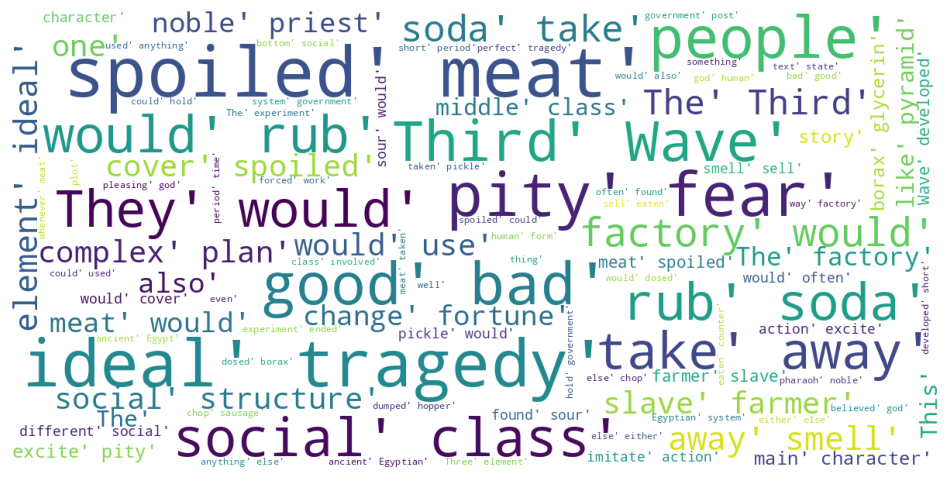

In [29]:
show_wordcloud(infinitives)

### Sentiment analysis

In [30]:
!pip install textblob

from textblob import TextBlob

polarity: is a floating-point number that lies in the range of [-1,1] where 1 means positive statement and -1 means a negative statement.

subjectivity: refers to how someone’s judgment is shaped by personal opinions and feelings. 
Subjectivity is represented as a floating-point value which lies in the range of [0,1].

In [31]:
def polarity(text):
    return TextBlob(text).sentiment.polarity

In [32]:
summaries_train_df['polarity_score'] = summaries_train_df['text'].apply(lambda x: polarity(x))

In [33]:
summaries_train_df['polarity_score'].iplot(
    kind='hist',
    bins=100,
    xTitle='polarity score',
    yTitle='count',
    title='Summaries polarity score distribution',
    color='blue'
)

In [34]:
def subjectivity(text):
    return TextBlob(text).sentiment.subjectivity

In [35]:
summaries_train_df['subjectivity_score'] = summaries_train_df['text'].apply(lambda x: subjectivity(x))

In [36]:
summaries_train_df['subjectivity_score'].iplot(
    kind='hist',
    bins=100,
    xTitle='subjectivity score',
    yTitle='count',
    title='Summaries subjectivity score distribution',
    color='blue'
)

In [37]:
def sentiment(x):
    if x<0:
        return 'neg'
    elif x==0:
        return 'neu'
    else:
        return 'pos'

In [38]:
positiveness = summaries_train_df['polarity_score'].apply(lambda x: sentiment(x))

positiveness.iplot(
    kind='hist',
    bins=3,
    xTitle='positivnes',
    yTitle='count',
    title='Summaries subjectivity positiveness ',
    color='blue'
)

# Calculate the counts for each category (neg, neu, pos)
count_by_category = positiveness.value_counts()

# show percentages
total_count = len(positiveness)
percentages = count_by_category / total_count * 100

percentages.iplot(
    kind='bar',
    xTitle='positiveness',
    yTitle='Percentage',
    title='Summaries subjectivity positiveness (in %)',
    color='blue'
)

Showing some positive summaries

In [80]:
summaries_train_df[summaries_train_df['polarity_score'] > 0]['text'].sample(5).values

array(['One way that the factory would use the spoiled meat is by mixing it in with the good meat. Another way is they would use chemicals to make the meat smell better to mask the spoiledness. they would even color the meat with gelatin to make it look better.',
       'its like a pirimd the lowest are on the bottam and the fero (who are said to be god like people) were at the top, and only nobles could hold a govermenrs place. they had farmers, soldures and slaves from the wars ',
       'Aristotle explains that a perfect tragedy should be arranged in a complex plan rather than a simple plan. He mentioned that it should, moreover, imitate actions which excite pity and fear which should be the distinctive mark of tragic imitation. Aristotle also mentions that an ideal tragedy possessess no single tragic quality and neither satifies the moral nor calls forth pity or fear. He then greatly emphasizes that an ideal tragedy should never exhibit the downfall of the utter villain. This is be

Showing some neutral summaries

In [77]:
summaries_train_df[summaries_train_df['polarity_score'] == 0]['text'].sample(5).values

array(['th ancient egpitan is a egepton  belivence of how they had goods that rueld all over them and  when they deid they would have julerwy, food and othe things to join them in the after life .',
       'Essentially, factories would dye the meat brown in an attempt to cover up the fact that it\'s actually an unsanitary color. "...they would call upon their chemistry department, and preserve it with borax and color it with gelatin to make it brown" (Paragraph 5).',
       'They would inject spoiled meat with pickle, or preserve it in borax and and cour it with gelatin.  They would use chemist to give the meat an apperance of cleanliness.',
       '    They would rub it with baking soda to take away the smell. "..they would rub it up with soda to take away the smell..." They would also pump up the meat with pickles.  ',
       'Factories would cover the smell with soda or pickle juice they would also give the meat to their chemistry lab to fix the smell and color the meat to look brow

Showing some negative summaries

In [78]:
summaries_train_df[summaries_train_df['polarity_score'] < 0]['text'].sample(5).values

array(['If The meat was sour they would rub it up with soda to take the smell away. Sometimes when hame was spoiled it created such a smell that it was hard for a worker to even stay in the room, to change this they developed a much stronger pickle to eliminate the smell completely. The dosed rejected sausage with borax and glycerin and dumped it into the hoppers for home consumption.',
       'Tragedy much b complex, Tragedy much b complex, t must be a man that is NOT perfect, and their downfall is a result of a mistake or weakness.',
       'they would mixed the spoiled ham with other meat so you couldent smell the oder as it says in the text " . Cut up by the two-thousand-revolutions- a-minute flyers, and mixed with half a ton of other meat, no odor that ever was in a ham could make any difference" ',
       'The different ways the factories would use and cover up  spoiled meats were by cutting the left over or spoiled meat into little pieces so that they could make sausages out of 

### Vader sentiment analysis

In [42]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [44]:
nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()

def get_vader_score(sent):
    # Polarity score returns dictionary
    ss = sid.polarity_scores(sent)
    #return ss
    return np.argmax(list(ss.values())[:-1])

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/duje/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [47]:
import numpy as np
summaries_train_df['vader_score'] = summaries_train_df['text'].map(lambda x: get_vader_score(x))

In [60]:
vader_score = summaries_train_df['vader_score'].replace({0:'neg',1:'neu',2:'pos'})

vader_score.iplot(
    kind='hist',
    bins=3,
    xTitle='Vader score',
    yTitle='count',
    title='Summaries Vader score distribution',
    color='blue'
)

##### Readability score

Readability index is a numeric value that indicates how difficult (or easy) it is to read and understand a text.

In [54]:
!pip install textstat
from textstat import flesch_reading_ease


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.1/105.1 kB 2.0 MB/s eta 0:00:003.9 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 18.6 MB/s eta 0:00:00m eta 0:00:010:01


/Users/duje/opt/anaconda3/envs/CommonLit_env/lib/python3.11/site-packages/textstat/textstat.py:7: DeprecationWarning:

pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html



In [57]:
summaries_train_df['readability_score'] = summaries_train_df['text'].apply(lambda x : flesch_reading_ease(x))

summaries_train_df['readability_score'].iplot(
    kind='hist',
    bins=100,
    xTitle='Readability score',
    yTitle='count',
    title='Summaries readability score distribution',
    color='blue'
)

Explanation:

90-100	very easy to read, easily understood by an average 11-year-old student

80-90	easy to read

70-80	fairly easy to read

60-70	easily understood by 13- to 15-year-old students

50-60	fairly difficult to read

30-50	difficult to read, best understood by college graduates

0-30	very difficult to read, best understood by university graduates